In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [569]:
from entropy import *
from Bottleneck import Bottleneck

rng = np.random.RandomState(1)

In [570]:
N = 3  # number of spins
Nc = 2  # number of clusters
K = 100  # data points

Take votes to be completely random except that 2 and 3 vote exactly the same.

Take final vote to be the sign of the majority vote.

In [571]:
# Random votes.
v = rng.choice([-1.,1.],size=(K,N))
# majVote = logical_xor( sign(v[:,:2].sum(1))==-1, v[:,-1]==-1 )*2-1
v[:,-1] = v[:,1]  # make voter 3 the duplicate of voter 2

majVote = sign( v.sum(1) )

# P({s_i}), all observed individual voting configurations
PofSi = bincount(unique_rows(v,return_inverse=True))
PofSi = PofSi/PofSi.sum()

# Unique {s_i}
uniqueSi = v[unique_rows(v)]
uniqueSi[:,-1] = uniqueSi[:,1]

# Majority votes corresponding to unique {s_i}
totalVote = sign(uniqueSi.sum(1))

In [573]:
# Run minimization routine.
bottleSolver = Bottleneck(N,Nc)
bottleSolver.rng = np.random.RandomState(1)
bottleSolver.setup(PofSi,uniqueSi)

In [574]:
# Run solver and print success message.
%timeit -n1 -r3 print bottleSolver.solve(method='powell')
print bottleSolver.soln['message']
print bottleSolver.soln['fun']

# Show individual bottle and accuracy terms from the cost function we are minimizing.
# The accuracy should be as close as possible to the entropy of the final output, or 2 bits.
print bottleSolver.bottleneck, bottleSolver.accuracy

[[  1.0000e+00   5.6959e-09   5.2502e-10]
 [  8.9708e-10   1.0000e+00   1.0000e+00]]
[[  1.0000e+00   5.4603e-11   7.9092e-09]
 [  1.6272e-10   1.0000e+00   1.0000e+00]]
[[  1.0000e+00   1.1745e-09   8.3629e-10]
 [  2.0716e-11   1.0000e+00   1.0000e+00]]
1 loops, best of 3: 203 ms per loop
Optimization terminated successfully.
0.999711556561
1.99942293591 0.999711379348


In [566]:
# Run solver and print success message.
%timeit -n1 -r3 print bottleSolver.solve(method='powell')
print bottleSolver.soln['message']
print bottleSolver.soln['fun']

# Show individual bottle and accuracy terms from the cost function we are minimizing.
# The accuracy should be as close as possible to the entropy of the final output, or 2 bits.
print bottleSolver.bottleneck, bottleSolver.accuracy

[[  1.0000e+00   5.6959e-09   5.2502e-10]
 [  8.9708e-10   1.0000e+00   1.0000e+00]]
[[  1.0000e+00   5.4603e-11   7.9092e-09]
 [  1.6272e-10   1.0000e+00   1.0000e+00]]
[[  1.0000e+00   1.1745e-09   8.3629e-10]
 [  2.0716e-11   1.0000e+00   1.0000e+00]]
1 loops, best of 3: 201 ms per loop
Optimization terminated successfully.
0.999711556561
1.99942293591 0.999711379348


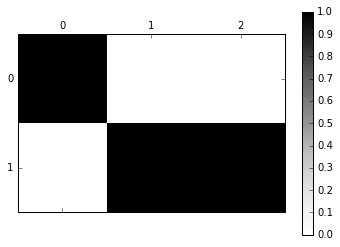

In [577]:
plt.matshow( bottleSolver.clusterAssignP,cmap=plt.cm.Greys,vmin=0,vmax=1 )
plt.colorbar()

In [578]:
# Check that probability is properly normalized.
PSc = zeros((2**Nc))
for j,sc in enumerate(xbin_states(Nc,sym=True)):
    dp = ones((4))
    for kc,k in enumerate(sc):
        dp *= r[kc,int(k==1),:]
    dp *= PofSi
    PSc[j] += dp.sum()

IndexError: invalid index to scalar variable.

In [100]:
# Run solver and print success message.
%timeit print bottleSolver.solve(method='powell')
print bottleSolver.soln['message']

# Show individual bottle and accuracy terms from the cost function we are minimizing.
# The accuracy should be as close as possible to the entropy of the final output, or 2 bits.
print bottleSolver.bottleneck, bottleSolver.accuracy

[[  5.1784e-01   7.4321e-01   7.8790e-16   4.8731e-01   5.1797e-01   2.9750e-01]
 [  4.8216e-01   2.5679e-01   1.0000e+00   5.1269e-01   4.8203e-01   7.0250e-01]]
[[  5.2008e-01   6.6478e-01   2.9995e-14   4.8764e-01   5.1941e-01   3.7782e-01]
 [  4.7992e-01   3.3522e-01   1.0000e+00   5.1236e-01   4.8059e-01   6.2218e-01]]
[[  5.4428e-08   4.1079e-01   5.0511e-12   5.9057e-10   3.7373e-11   6.5770e-01]
 [  1.0000e+00   5.8921e-01   1.0000e+00   1.0000e+00   1.0000e+00   3.4230e-01]]
[[  5.1945e-01   4.0872e-01   7.6003e-15   4.8755e-01   5.1900e-01   6.3335e-01]
 [  4.8055e-01   5.9128e-01   1.0000e+00   5.1245e-01   4.8100e-01   3.6665e-01]]
1 loops, best of 3: 2.17 s per loop
Optimization terminated successfully.
1.99300076154 0.86591542267


In [579]:
# Now, taking beta to the limit of infinity...this should improve accuracy.
bottleSolver.beta = 100
bottleSolver.setup(PofSi,uniqueSi)

bottleSolver.L(bottleSolver.clusterAssignP.ravel(),True)

(1.9994228835056198, 0.9997114417528099)

Sample states with Ising model. This will be good to try with various couplings Jij.

In [581]:
import tosolve11.tosolve3 as tosolve

In [582]:
N = 3  # number of spins
Nc = 2  # number of clusters
K = 100  # data points

J = random.normal(size=N*(N-1)//2)
h = random.normal(size=N)

# Correlated votes.
v = bin_states(N,sym=True)[random.choice(range(2**N),size=(K,),
                                         p=tosolve.get_probs(concatenate((h,J))))]

In [584]:
J

array([ 1.2497,  0.7979,  1.3935])

In [585]:
# Run solver and print success message.
print bottleSolver.solve(method='powell')
print bottleSolver.soln['message']
print bottleSolver.soln['fun']

# Show individual bottle and accuracy terms from the cost function we are minimizing.
# The accuracy should be as close as possible to the entropy of the final output, or 2 bits.
print bottleSolver.bottleneck, bottleSolver.accuracy

[[ 0.5616  0.3855  0.5409]
 [ 0.4384  0.6145  0.4591]]
Optimization terminated successfully.
0.999711441753
1.99942288351 0.999711441753


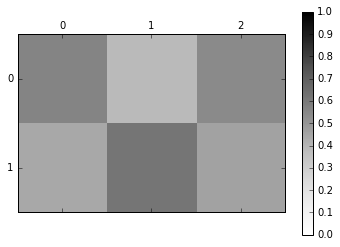

In [586]:
plt.matshow( bottleSolver.clusterAssignP,cmap=plt.cm.Greys,vmin=0,vmax=1 )
plt.colorbar()